# Imports

In [1]:
from config import *
from core import *
from helper import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Config

In [2]:
frequencies = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
bases = [10, 15, 20]
qtables = [JPEG_STD_LUM]

# Run Sample

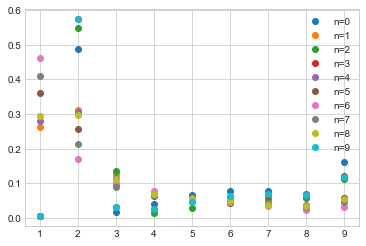

In [7]:
img = load_img_from_url(SAMPLE_IMG_URLS[2])

# blocks = ImageBlockIterator(img)

dct_coeffs = get_image_dct_coefs(img, frequencies, qtables)
fds = dct_coeff_to_first_digit(dct_coeffs, 10)
pmf = get_dct_fd_pmf(fds, 10)

x = [i+1 for i in range(9)]

for i in range(pmf.shape[1]):
    plt.plot(x, pmf[:,i,0], 'o', label=f"n={frequencies[i]}")

plt.legend(numpoints=1)

# Plots

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error

def fit_pmf_to_benford(p: np.ndarray) -> np.ndarray:
    pass

@np.vectorize
def general_benford_pmf(digit, beta, gamma, delta, base):
    """ General, parameterized form of benfords law. """
    p = beta * log(1 + 1/(gamma + digit**delta), base)
    return p

In [12]:
ds = np.array([i+1 for i in range(9)])


In [14]:
pmf_ben = general_benford_pmf(ds, 1, 1, 1, 10)

0.004970971541243202
0.005835490880298619
0.00950921475778887


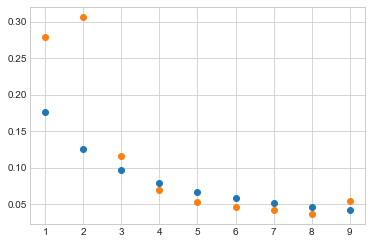

In [26]:
plt.plot(ds, pmf_ben, 'o')
plt.plot(ds, pmf[:,4,0], 'o')

print(mean_squared_error(pmf[:,4,0], pmf_ben))
print(mean_squared_error(pmf[:,5,0], pmf_ben))
print(mean_squared_error(pmf[:,6,0], pmf_ben))